## Importing python libraries and starting a sas session locally on windows

In [196]:
import os
import json
from pprint import pprint
from airtable import Airtable
import pandas as pd
import saspy
sas = saspy.SASsession(cfgname='winlocal')

SAS Connection established. Subprocess id is 24760



**- which database - base key**   
**- which table - yield**  
**- api key - stored locally as an environement variable in windows**


In [78]:
base_key = 'appInRX5iM5iijXuY'
table_name = 'yield'
wheat_yield = Airtable(base_key, table_name, api_key=os.environ['AIRTABLE_API_KEY'])
print(wheat_yield)

SAS Connection established. Subprocess id is 66280

<Airtable table:yield>


## Call airtable library and get every record in the previously identified table

Stuff in parentheses after dataframe call is a mystery.  Found at https://github.com/gtalarico/airtable-python-wrapper/blob/master/Airtable.ipynb
Delete the Date/Time column because sas hates it

In [133]:
examplerecords = airtable.get_all()    
wheat_yield_df = pd.DataFrame.from_records((r['fields'] for r in examplerecords))
wheat_yield_df = wheat_yield_df.drop(columns='Date/Time')

In [134]:
wheat_yield_df.head(3)

,Moisture,Range,Row,SEQ#,Tstwght,Weight,entry,id,loc,lodging,plot,plot length (ft)
0,14.491,2,12,63,67.762,6.643,21,G47,G,2,47,18.95
1,13.724,1,1,1,72.021,3.975,13,G1,G,4,1,18.75
2,0,4,19,1,0,0.732,17,H76,H,NaN,76,21.00


## Declare a sas libary on your local machine.  This is really just like a temp file to move data from pandas to sas.
Windows normal string vs raw string, see: https://stackoverflow.com/questions/37400974/unicode-error-unicodeescape-codec-cant-decode-bytes-in-position-2-3-trunca

In [135]:
sas.saslib('example', path=r"C:\Users\screberg\Documents\My SAS Files") 

94                                                         The SAS System                                19:19 Monday, June 24, 2019

4463       
4464       libname example    'C:\Users\screberg\Documents\My SAS Files'  ;
NOTE: Libref EXAMPLE was successfully assigned as follows: 
      Engine:        V9 
      Physical Name: C:\Users\screberg\Documents\My SAS Files
4465       
4466       


# Move data from pandas to SAS

In [142]:
sas_yield = sas.df2sd(df=wheat_yield_df,table='sas_yield',libref='example')
sas_yield.head(3)

,Moisture,Range,Row,SEQ#,Tstwght,Weight,entry,id,loc,lodging,plot,plot length (ft)
0,14.491,2,12,63,67.762,6.643,21,G47,G,2,47,18.95
1,13.724,1,1,1,72.021,3.975,13,G1,G,4,1,18.75
2,0,4,19,1,0,0.732,17,H76,H,NaN,76,21.00


## This lets us look at some basic statistics for the variable of interest  
dealing with temporary problem - all the data came in as character


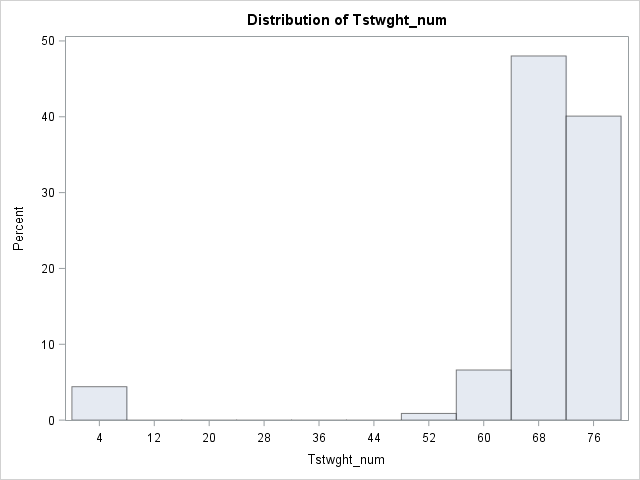

In [149]:
%%SAS
libname example 'C:\Users\screberg\Documents\My SAS Files';
data example.sas_yield; set example.sas_yield;
   Tstwght_num = input(Tstwght, 8.); run;
proc univariate data=example.sas_yield; 
Var Tstwght_num; 
Histogram;
run;